In [1]:
import pystac_client
import matplotlib.pyplot as plt
from pyproj import Transformer

In [2]:
catalog = pystac_client.Client.open(
    "https://stac.core.eopf.eodc.eu"
)

In [3]:
list(catalog.get_collections())

[<CollectionClient id=sentinel-2-l2a>,
 <CollectionClient id=sentinel-1-l1-grd>,
 <CollectionClient id=sentinel-3-slstr-l2-lst>,
 <CollectionClient id=sentinel-3-slstr-l1-rbt>,
 <CollectionClient id=sentinel-3-olci-l2-lfr>,
 <CollectionClient id=sentinel-3-olci-l2-lrr>,
 <CollectionClient id=sentinel-3-olci-l1-efr>,
 <CollectionClient id=sentinel-1-l2-ocn>,
 <CollectionClient id=sentinel-2-l1c>,
 <CollectionClient id=sentinel-1-l1-slc>,
 <CollectionClient id=sentinel-3-olci-l1-err>,
 <CollectionClient id=sentinel-3-slstr-l2-frp>]

In [4]:
bbox_chafarinas = [
    -2.45,   # min lon
    35.174,  # min lat
    -2.415,   # max lon
    35.186   # max lat
]

temporal_extent = ["2026-01-01", None]

In [5]:
items = list(
    catalog.search(
        collections=["sentinel-2-l2a"],
        bbox=bbox_chafarinas,
        datetime=temporal_extent,
        query={"eo:cloud_cover": {"lt": 20}},
    ).items()
)
print(f"Found {len(items)} Sentinel-2 L2A products")


Found 2 Sentinel-2 L2A products


In [6]:
item = items[0]
list(item.assets.keys())

['SR_10m',
 'SR_20m',
 'SR_60m',
 'AOT_10m',
 'B01_20m',
 'B02_10m',
 'B03_10m',
 'B04_10m',
 'B05_20m',
 'B06_20m',
 'B07_20m',
 'B08_10m',
 'B09_60m',
 'B11_20m',
 'B12_20m',
 'B8A_20m',
 'SCL_20m',
 'TCI_10m',
 'WVP_10m',
 'product',
 'zipped_product',
 'product_metadata']

In [7]:
import xarray as xr

xr.set_options(display_expand_attrs=False)

stac_item = items[-1]
zarr_url = stac_item.assets["product"].href

ds = xr.open_datatree(zarr_url, engine="zarr")
ds

<xarray.DataTree>
Group: /
│   Attributes: (3)
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, detector: 6, y: 23,
│   │                                           x: 23)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b00' 'b01' ... 'b11' 'b12'
│   │         * detector                       (detector) <U3 72B 'd02' 'd03' ... 'd07'
│   │         * x                              (x) float32 92B 5e+05 5.05e+05 ... 6.1e+05
│   │         * y                              (y) float32 92B 3.9e+06 ... 3.79e+06
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B ...
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B ...
│   │           sun_angles                     (angle, y, x) float64 8kB ...
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 660kB ...
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) float32 44kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
│   │   │   │         * y        (y) float32 44kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB ...
│   │   │   │           b03      (y, x) uint8 121MB ...
│   │   │   │           b04      (y, x) uint8 121MB ...
│   │   │   │           b08      (y, x) uint8 121MB ...
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) float32 22kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
│   │   │   │         * y        (y) float32 22kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB ...
│   │   │   │           b06      (y, x) uint8 30MB ...
│   │   │   │           b07      (y, x) uint8 30MB ...
│   │   │   │           b11      (y, x) uint8 30MB ...
│   │   │   │           b12      (y, x) uint8 30MB ...
│   │   │   │           b8a      (y, x) uint8 30MB ...
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) float32 7kB 5e+05 5.001e+05 5.001e+05 ... 6.097e+05 6.098e+05
│   │   │             * y        (y) float32 7kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB ...
│   │   │               b09      (y, x) uint8 3MB ...
│   │   │               b10      (y, x) uint8 3MB ...
│   │   ├── Group: /conditions/mask/l1c_classification
│   │   │   └── Group: /conditions/mask/l1c_classification/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) float32 7kB 5e+05 5.001e+05 5.001e+05 ... 6.097e+05 6.098e+05
│   │   │             * y        (y) float32 7kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
│   │   │           Data variables:
│   │   │               b00      (y, x) uint8 3MB ...
│   │   └── Group: /conditions/mask/l2a_classification
│   │       ├── Group: /conditions/mask/l2a_classification/r20m
│   │       │       Dimensions:  (y: 5490, x: 5490)
│   │       │       Coordinates:
│   │       │         * x        (x) float32 22kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
│   │       │         * y        (y) float32 22kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
│   │       │       Data variables:
│   │       │           scl      (y, x) float64 241MB ...
│   │       └── Group: /conditions/mas

In [8]:
ds = xr.open_dataset(zarr_url, engine="eopf-zarr")
ds

<xarray.Dataset> Size: 14GB
Dimensions:      (x: 10980, y: 10980)
Coordinates:
  * x            (x) float32 44kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float32 44kB 3.9e+06 3.9e+06 3.9e+06 ... 3.79e+06 3.79e+06
    spatial_ref  int64 8B ...
Data variables: (12/15)
    b02          (y, x) float64 964MB ...
    b03          (y, x) float64 964MB ...
    b04          (y, x) float64 964MB ...
    b08          (y, x) float64 964MB ...
    b01          (y, x) float64 964MB ...
    b05          (y, x) float64 964MB ...
    ...           ...
    b12          (y, x) float64 964MB ...
    b8a          (y, x) float64 964MB ...
    cld          (y, x) float32 482MB ...
    snw          (y, x) float32 482MB ...
    scl          (y, x) float64 964MB ...
    b09          (y, x) float64 964MB ...
Attributes: (24)

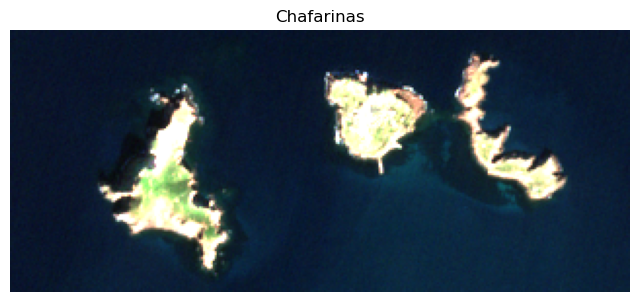

In [9]:
import numpy as np

datacube_sample = ds

crs = datacube_sample.rio.crs
transformer = Transformer.from_crs("EPSG:4326", crs, always_xy=True)
minx, miny = transformer.transform(bbox_chafarinas[0], bbox_chafarinas[1])
maxx, maxy = transformer.transform(bbox_chafarinas[2], bbox_chafarinas[3])

datacube_sample = datacube_sample.sel(x=slice(minx, maxx), y=slice(maxy, miny))

rgb = datacube_sample[["b04", "b03", "b02"]].to_dataarray(dim="band")
rgb = rgb.assign_coords(band=["red", "green", "blue"])

vmin = float(rgb.min())
vmax = float(rgb.quantile(0.95))
rgb_scaled = (rgb - vmin) / (vmax - vmin)
rgb_scaled = rgb_scaled.clip(0, 1)

rgb_img = rgb_scaled.transpose("y", "x", "band").values

rgb_img = np.ma.masked_invalid(rgb_img)

# Mask water using SCL (class 6 = water), interpolated to 10m
scl = datacube_sample["scl"]
water_mask = scl == 6

x = datacube_sample.x.values
y = datacube_sample.y.values

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(rgb_img, extent=[x.min(), x.max(), y.min(), y.max()])

ax.set_title("Chafarinas")
ax.axis("off")
plt.show()

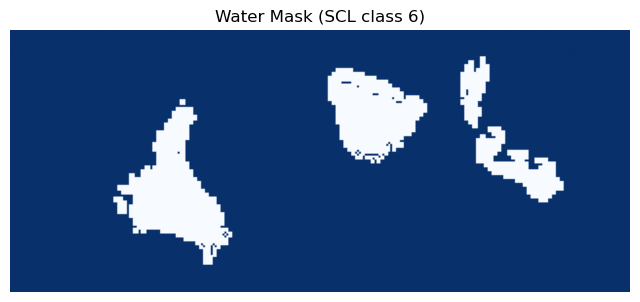

In [10]:
# Plot the water mask separately
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(water_mask, extent=[scl.x.min(), scl.x.max(), scl.y.min(), scl.y.max()], cmap='Blues')
ax.set_title("Water Mask (SCL class 6)")
ax.axis("off")
plt.show()

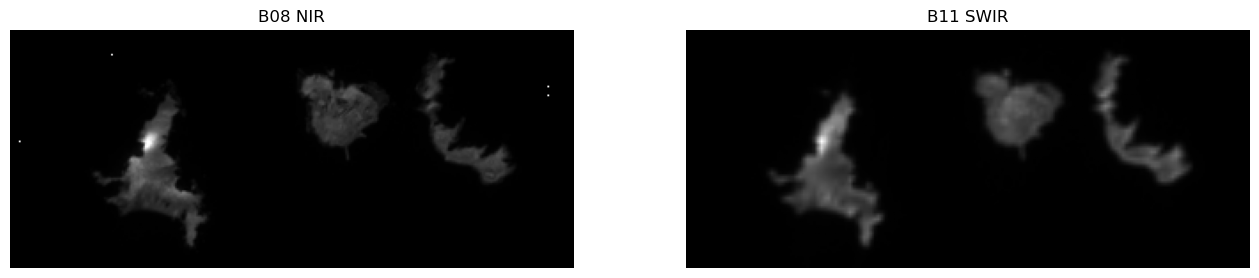

In [11]:
# Plot other bands: B08 (NIR) and B11 (SWIR)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

b08 = datacube_sample["b08"]
axes[0].imshow(b08, extent=[x.min(), x.max(), y.min(), y.max()], cmap='gray')
axes[0].set_title("B08 NIR")
axes[0].axis("off")

b11 = datacube_sample["b11"]
axes[1].imshow(b11, extent=[x.min(), x.max(), y.min(), y.max()], cmap='gray')
axes[1].set_title("B11 SWIR")
axes[1].axis("off")

plt.show()